<a href="https://colab.research.google.com/github/sbylash/23_Shasia-Sasa_PCVK/blob/main/Week6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
from matplotlib import pyplot as plt
import numpy as np
import math
import os
import glob

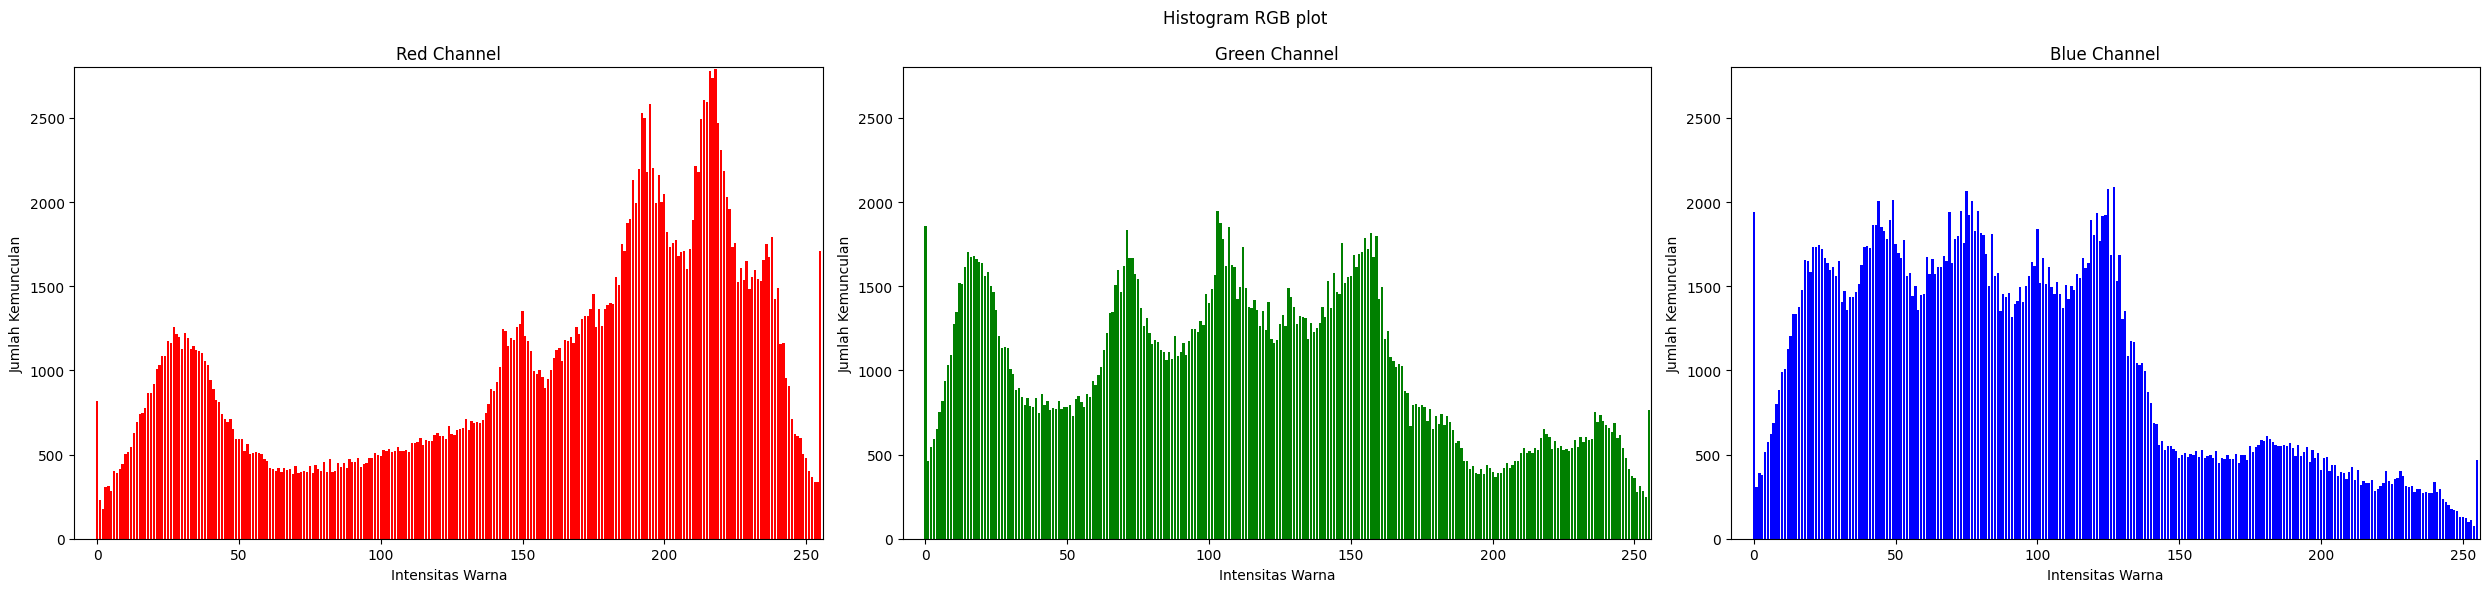

In [ ]:
image = cv.imread('/content/drive/MyDrive/Week2/Images/lena.jpg')

channels = cv.split(image)
colors = ('r', 'g', 'b')
channel_names = ['Red', 'Green', 'Blue']

plt.figure(figsize=(25, 6))
plt.suptitle('Histogram RGB plot')

histograms = [cv.calcHist([channel], [0], None, [256], [0, 256]) for channel in channels]

histograms[0], histograms[2] = histograms[2], histograms[0]

for i, histogram in enumerate(histograms):
    plt.subplot(1, 3, i + 1)
    plt.bar(np.arange(256), histogram[:, 0], color=colors[i])
    plt.title(f'{channel_names[i]} Channel')
    plt.xlabel('Intensitas Warna')
    plt.ylabel('Jumlah Kemunculan')
    plt.xlim([-8, 256])
    plt.ylim([0, 2800])

plt.tight_layout()
plt.show()